## Proyecto ajuste de curvas de la acción de APPLE

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


data = pd.read_excel("AAPL (21-09-2020 - 19-09-2023.xlsx")
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-01,177.699997,180.119995,176.929993,180.089996,179.847137,68901800
1,2023-06-02,181.029999,181.779999,179.259995,180.949997,180.705978,61945900
2,2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500
3,2023-06-06,179.970001,180.119995,177.429993,179.210007,178.968338,64848400
4,2023-06-07,178.440002,181.210007,177.320007,177.820007,177.580200,61944600
...,...,...,...,...,...,...,...
71,2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
72,2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800
73,2023-09-15,176.479996,176.500000,173.820007,175.009995,175.009995,109205100
74,2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600


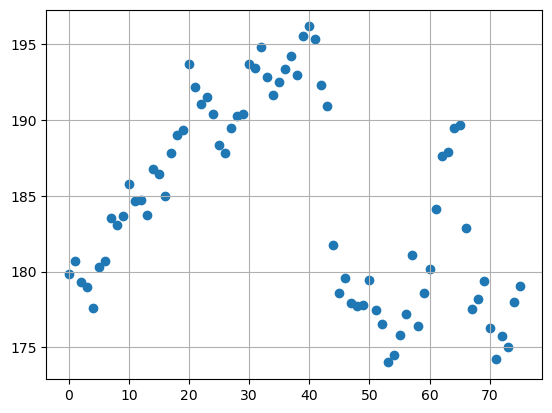

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

m = len(data)
x = np.linspace(0, m-1, m)
y = data["Adj Close"]

plt.figure()
plt.scatter(x, y)
plt.grid()

## 1. Regresión Lineal (con polinomios de grado 1-5)

In [28]:
%matplotlib inline

m = len(data)
x = np.linspace(0, m-1, m)
y = data["Adj Close"].to_numpy()

# y = b0 + b1*x

m = len(y)
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

# y = b0 + b1*x + b2*x**2
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )

# y = b0 + b1*x + b2*x**2 + b3*x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

# y = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4
beta4 = np.random.rand(5)
x4_factor = np.reshape(x**4, [m, 1])
X4 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor) )

# y = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5
#beta5 = np.random.rand(6)
#x5_factor = np.reshape(x**5, [m, 1])
#X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [51]:
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol2 = opt.minimize(funcion_de_costo, beta2, args=(X2, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))
sol4 = opt.minimize(funcion_de_costo, beta4, args=(X4, y_vector))
#sol5 = opt.minimize(funcion_de_costo, beta5, args=(X5, y_vector))

In [35]:
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2874.731962437312
        x: [ 1.882e+02 -9.789e-02]
      nit: 5
      jac: [ 0.000e+00  1.221e-04]
 hess_inv: [[ 4.581e-02 -9.091e-04]
            [-9.091e-04  2.152e-05]]
     nfev: 111
     njev: 33

In [31]:
sol2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1911.659815679614
        x: [ 1.806e+02  5.225e-01 -8.272e-03]
      nit: 7
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.732e-02 -2.325e-04 -1.069e-06]
            [-2.325e-04  1.294e-05 -1.338e-07]
            [-1.069e-06 -1.338e-07  3.225e-09]]
     nfev: 260
     njev: 65

In [32]:
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1497.7846570036975
        x: [ 1.749e+02  1.458e+00 -3.965e-02  2.789e-04]
      nit: 15
      jac: [-2.594e-04 -6.729e-03 -1.984e-01 -3.790e+00]
 hess_inv: [[ 9.463e-02 -9.403e-03  2.489e-04 -1.922e-06]
            [-9.403e-03  1.282e-03 -3.857e-05  3.193e-07]
            [ 2.489e-04 -3.857e-05  1.241e-06 -1.072e-08]
            [-1.922e-06  3.193e-07 -1.072e-08  9.534e-11]]
     nfev: 267
     njev: 51

In [33]:
sol4

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2715.0798047533503
        x: [ 1.711e+02  2.529e+00 -1.228e-01  2.354e-03 -1.570e-05]
      nit: 19
      jac: [-2.781e+01  1.397e+03  8.487e+04  1.378e+06 -1.760e+08]
 hess_inv: [[ 1.376e-01 -2.182e-02 ... -1.755e-05  1.037e-07]
            [-2.182e-02  4.856e-03 ...  4.826e-06 -2.996e-08]
            ...
            [-1.755e-05  4.826e-06 ...  5.757e-09 -3.760e-11]
            [ 1.037e-07 -2.996e-08 ... -3.760e-11  2.497e-13]]
     nfev: 522
     njev: 85

In [57]:
#sol5

## 2. Graficar polinomios

In [ ]:
def f1(x) :
    return  1.882e+02 - 9.789e-02*x
def f2(x):
    return  1.806e+02 + 5.225e-01*x - 8.272e-03*x**2
def f3(x):
    return  1.749e+02 + 1.458e+00*x - 3.965e-02*x**2 + 2.789e-04*x**3
def f4(x):
    return  1.711e+02 + 2.529e+00*x - 1.228e-01*x**2 + 2.354e-03*x**3 - 1.570e-05*x**4
#def f5(x):
    #return -5.358e+02 + 1.463e+02*x - 5.126e+02*x**2 - 7.940e+00*x**3 + 6.374e-01*x**4 - 7.337e-02*x**5

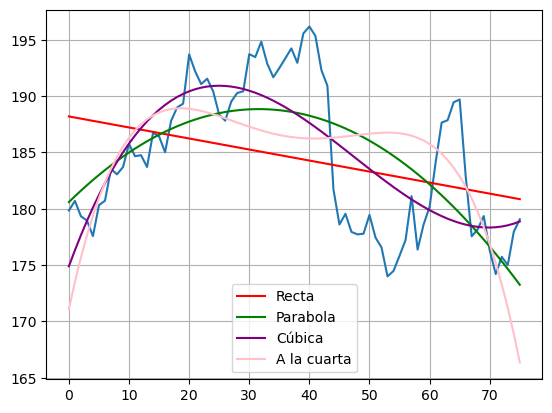

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

m = len(data)
x = np.linspace(0, m-1, m)
y = data["Adj Close"].to_numpy()


plt.figure()
plt.plot(x,y)
plt.plot(x, f1(x),"r", label= "Recta")
plt.plot(x, f2(x),"g", label= "Parabola")
plt.plot(x, f3(x),"purple", label= "Cúbica")
plt.plot(x, f4(x),"pink", label= "A la cuarta")
#plt.plot(x, f5(x),"y", label= "A la quinta")
plt.legend(loc= "best")
plt.grid()

## 3. Graficar error cuadrático contra número de términos

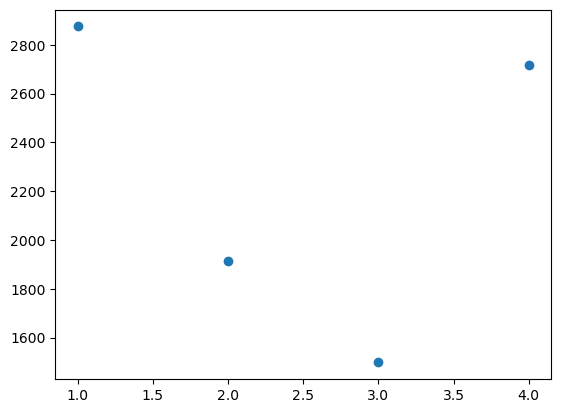

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([1, 2, 3, 4], [sol1.fun, sol2.fun, sol3.fun, sol4.fun])

<BarContainer object of 4 artists>

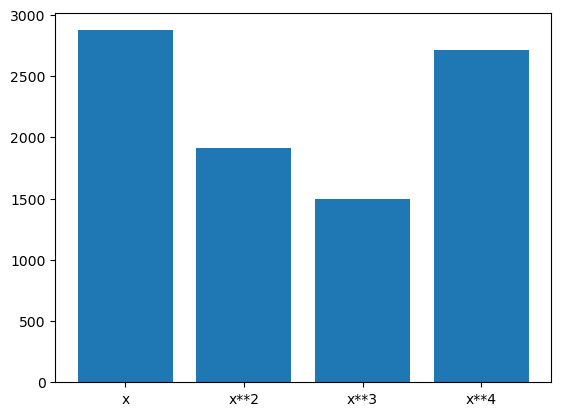

In [80]:
x = [1, 2, 3, 4]
y = [sol1.fun, sol2.fun, sol3.fun, sol4.fun]
etiquetas = ["x", "x**2", "x**3", "x**4"]
fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)

## 4. Predicción del precio del día siguiente. El precio fue de 176.85

In [81]:
s = 77
def f1(s) :
    return  1.882e+02 -9.789e-02*s
def f2(s):
    return  1.806e+02 + 5.225e-01*s - 8.272e-03*s**2
def f3(s):
    return  1.749e+02 + 1.458e+00*s - 3.965e-02*s**2 + 2.789e-04*s**3
def f4(s):
    return  1.711e+02 + 2.529e+00*s - 1.228e-01*s**2 + 2.354e-03*s**3 - 1.570e-05*s**4
#def f5(x):
    #return -5.358e+02 + 1.463e+02*x - 5.126e+02*x**2 - 7.940e+00*x**3 + 6.374e-01*x**4 - 7.337e-02*x**5

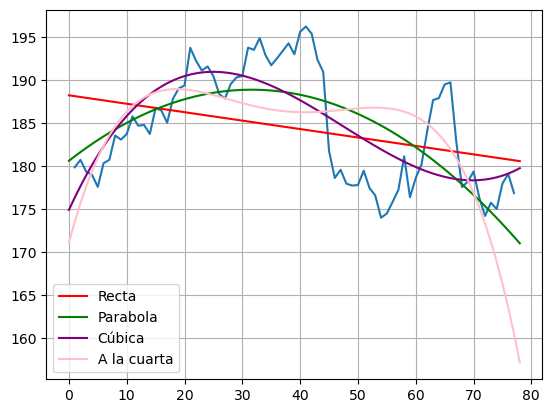

In [100]:
datos = pd.read_excel("Verificación.xlsx")
datos

m = len(datos)
x = np.linspace(0, m-1, m)
y = datos["Adj Close"].to_numpy()


plt.figure()
plt.plot(x,y)
plt.plot(s, f1(s),"r", label= "Recta")
plt.plot(s, f2(s),"g", label= "Parabola")
plt.plot(s, f3(s),"purple", label= "Cúbica")
plt.plot(s, f4(s),"pink", label= "A la cuarta")
#plt.plot(x, f5(x),"y", label= "A la quinta")
plt.legend(loc= "best")
plt.grid()